## Gráficos de Barra e de Área Empilhados
Usaremos um dataset que exibe os dados sobre crimes na região de Washington DC. Veremos como agregar esses dados de modo a possibilitar gerar gráficos de barra e de área que ilustram a evolução de diferentes tipos de crime no decorrer dos anos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos começar criando o dataframe a partir de um arquivo csv.

In [2]:
df = pd.read_csv('washingtonDCCrime.csv')

In [3]:
df.head()

,Year,Crime,Rate
0,2005,Murder,33.5
1,2006,Murder,29.1
2,2007,Murder,30.8
3,2008,Murder,31.4
4,2009,Murder,24.2


Agora, usando a função crosstab do pacote pandas vamos agrupar os crimes por ano(Year) / tipo do crime (Crime). Note que Rate é a taxa de crimes por 100 mil habitantes. \

Parâmetros principais da função pd.crosstab():\

index:\
O que é: A coluna que será usada como linhas da tabela cruzada.\
No exemplo: df['Year'] define que os anos ('Year') serão usados como os rótulos das linhas.\
Detalhe: Você pode passar diretamente a coluna do DataFrame ou uma lista de colunas para usar múltiplos níveis de índices.\

columns:\
O que é: A coluna que será usada como colunas da tabela cruzada.\
No exemplo: df['Crime'] define que os tipos de crime ('Crime') serão usados como os rótulos das colunas.\
Detalhe: Semelhante ao index, você pode passar mais de uma coluna para criar uma tabela com múltiplas colunas hierárquicas.\

values:\
O que é: A coluna cujos valores serão agregados (ou seja, a métrica que será utilizada para os cálculos).\
No exemplo: values=df['Rate'] especifica que a coluna 'Rate' contém os valores que serão somados ou agregados.\
Detalhe: Se não for especificado, o pd.crosstab() calcula a frequência de ocorrências, mas, neste caso, o values permite trabalhar com algum valor numérico (como somas, médias, etc.).\

aggfunc:\
O que é: A função de agregação a ser aplicada aos valores fornecidos em values.\
No exemplo: aggfunc='sum' indica que os valores da coluna 'Rate' devem ser somados para cada combinação de ano ('Year') e tipo de crime ('Crime').\
Outras opções: Você pode usar outras funções de agregação como 'mean', 'count', 'min', 'max', ou até mesmo funções customizadas.\

In [17]:
summary = pd.crosstab(df['Year'], df['Crime'], values=df['Rate'], aggfunc= 'sum')
summary

Crime,Aggravated Assault,Murder,Rape,Robery
Year,,,,
2005,682.2,33.5,28.5,635.7
2006,789.1,29.1,31.8,658.4
2007,626.7,30.8,32.6,725.0
2008,626.4,31.4,31.4,748.5
2009,565.3,24.2,25.0,734.4
2010,559.1,21.8,30.9,715.0
2011,494.0,17.4,27.9,661.4
2012,553.3,13.9,37.3,637.3
2013,590.8,15.9,45.8,628.9


Vamos agora plotar um gráfico de barras a partir do sumário gerado.

Text(0.5, 0, 'Year')

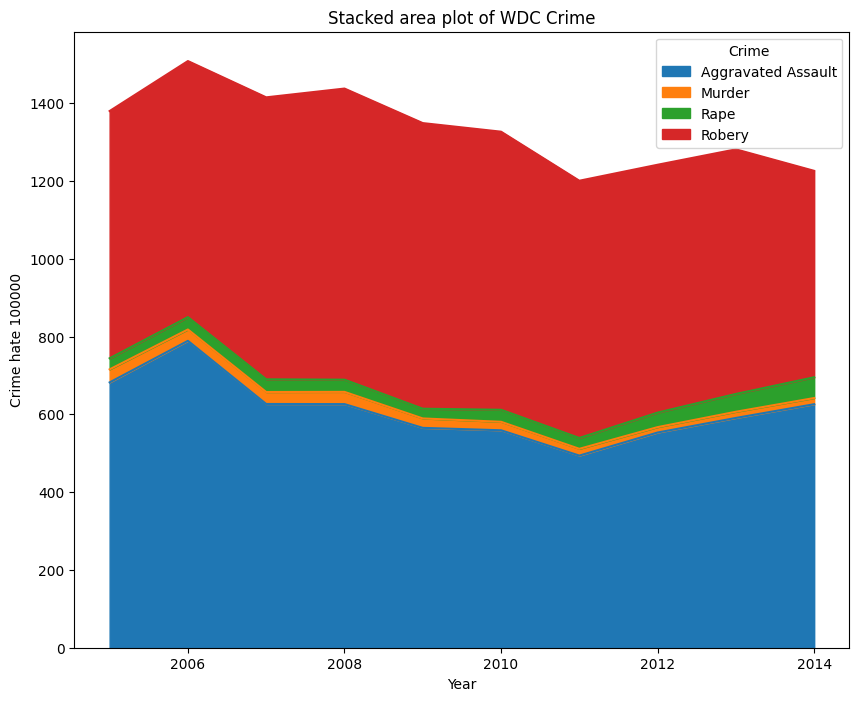

In [8]:
plt.rcParams['figure.figsize'] = [10,8]
summary.plot(kind='area', stacked=True)
plt.title('Stacked area plot of WDC Crime')
plt.ylabel('Crime hate 100000')
plt.xlabel('Year')

É possível melhorar o aspecto do gráfico customizando o tamanho da fonte, a posição das legendas, etc. Para tanto é necessário usar set_context do pacote seaborn.

Text(0.5, 0, 'Year')

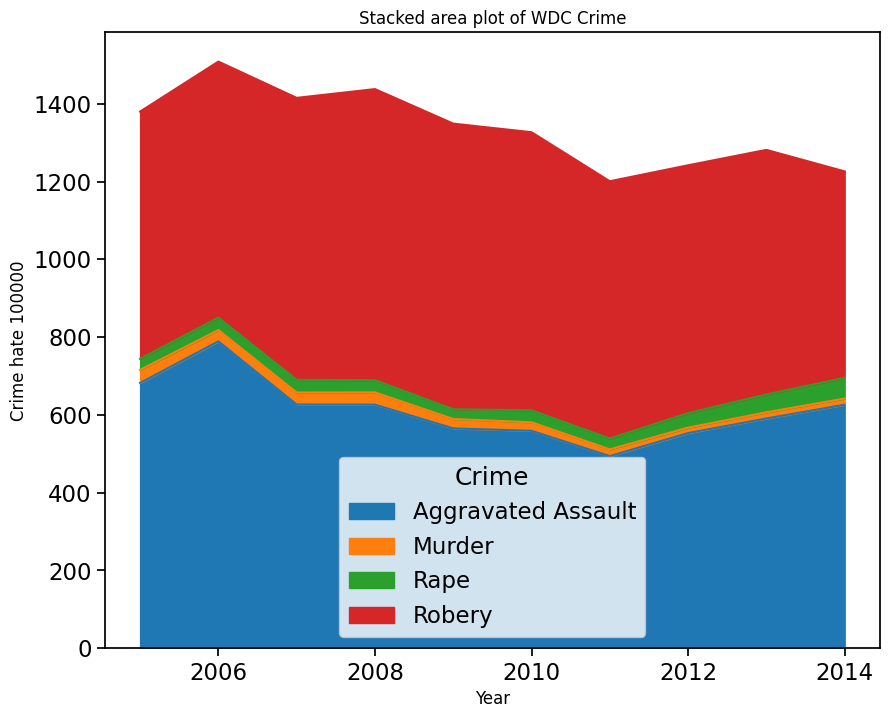

In [13]:
plt.rcParams['figure.figsize'] = [10,8]
sns.set_context('notebook', font_scale=1.5, rc={'font.size': 14, 'axes.labelsize':12, 'axes.titlesize': 12})
summary.plot(kind='area', stacked=True)
plt.title('Stacked area plot of WDC Crime')
plt.ylabel('Crime hate 100000')
plt.xlabel('Year')

Por fim, para gerar um gráfico de barras, basta trocar 'area' por 'bar'.

Text(0.5, 0, 'Year')

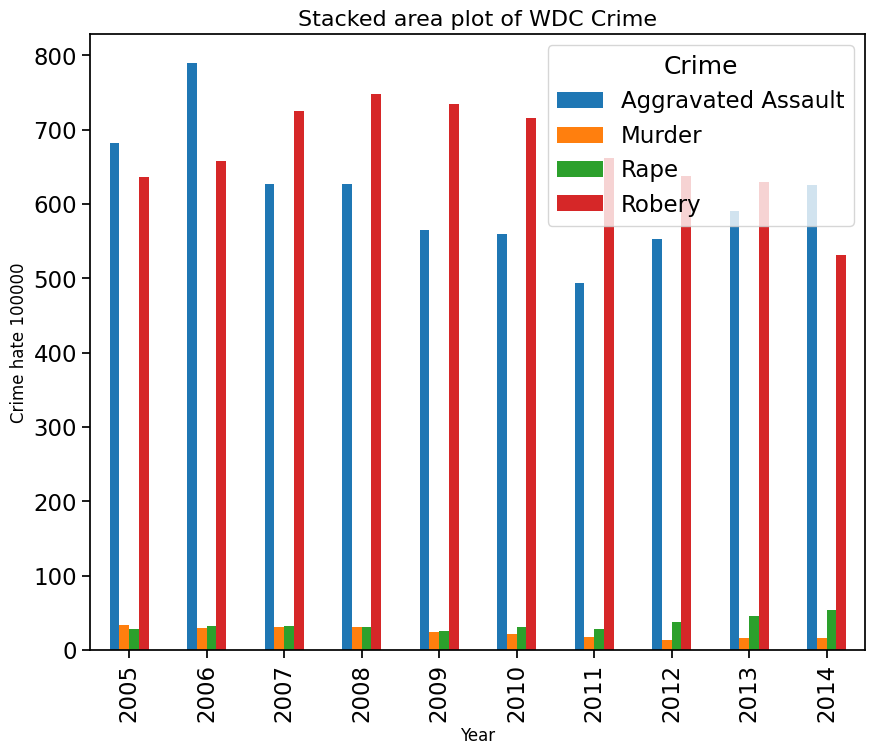

In [16]:
plt.rcParams['figure.figsize'] = [10,8]
sns.set_context('notebook', font_scale=1.5, rc={'font.size': 14, 'axes.labelsize':12, 'axes.titlesize': 16})
summary.plot(kind='bar', stacked=False,)
plt.title('Stacked area plot of WDC Crime')
plt.ylabel('Crime hate 100000')
plt.xlabel('Year')